# Geometric interpretation of Linear Regression

Nipun Batra  
2024-01-25

<figure>
<a
href="https://colab.research.google.com/github/nipunbatra/ml-teaching/blob/master/notebooks/geometric-linear-regression.ipynb"><img
src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
<figcaption>Open In Colab</figcaption>
</figure>

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

In [66]:
from latexify import latexify, format_axes
latexify(columns=2)

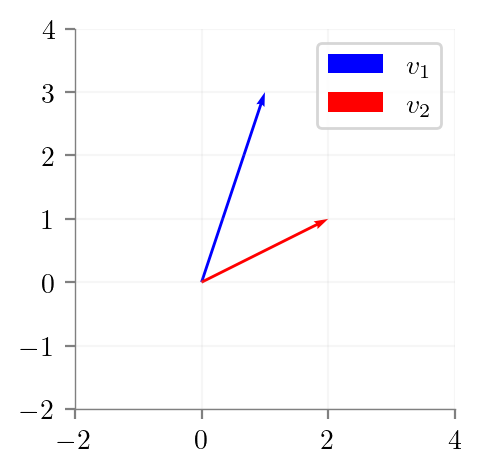

In [158]:


# Define points
A = (1, 3)
B = (2, 1)
Origin = (0, 0)

# Plot vectors
plt.quiver(*Origin, *A, angles='xy', scale_units='xy', scale=1, color='b', label='$v_1$')
plt.quiver(*Origin, *B, angles='xy', scale_units='xy', scale=1, color='r', label='$v_2$')

# Set axis limits
plt.xlim(-2, 4)
plt.ylim(-2, 4)

# Add legend
plt.legend()

# Show plot
plt.grid(alpha=0.1)

ax = plt.gca()
format_axes(ax)
ax.set_aspect('equal')
plt.savefig('../figures/linear-regression/geoemetric-span-1.pdf', bbox_inches='tight')


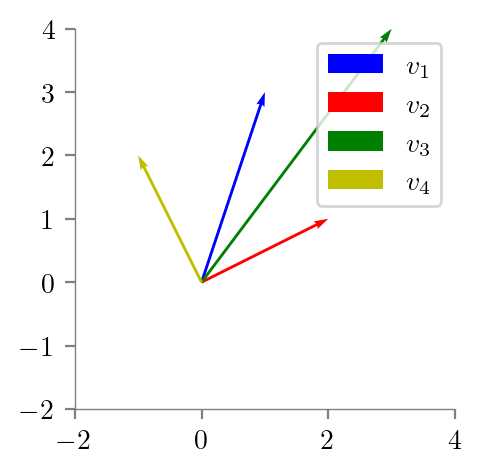

In [159]:
# Now, create v3 = v1 + v2 and v4 = v1 - v2 and plot
C = (A[0] + B[0], A[1] + B[1])
D = (A[0] - B[0], A[1] - B[1])

# Set axis limits
plt.xlim(-2, 4)
plt.ylim(-2, 4)

plt.quiver(*Origin, *A, angles='xy', scale_units='xy', scale=1, color='b', label='$v_1$')
plt.quiver(*Origin, *B, angles='xy', scale_units='xy', scale=1, color='r', label='$v_2$')
plt.quiver(*Origin, *C, angles='xy', scale_units='xy', scale=1, color='g', label='$v_3$')
plt.quiver(*Origin, *D, angles='xy', scale_units='xy', scale=1, color='y', label='$v_4$')

ax = plt.gca()
format_axes(ax)
plt.legend()

ax.set_aspect('equal')
plt.savefig('../figures/linear-regression/geoemetric-span-2.pdf', bbox_inches='tight')


In [160]:
A_arr = np.array(A)
B_arr = np.array(B)

AB_matrix = np.zeros((2, 2))
# First column is A, second column is B
AB_matrix[:, 0] = A_arr
AB_matrix[:, 1] = B_arr

print(AB_matrix)

[[1. 2.]
 [3. 1.]]

In [161]:
def new_vector(AB_matrix, alpha):
    return AB_matrix @ alpha

print(new_vector(AB_matrix, np.array([1, -1])))

[-1.  2.]

In [165]:
# Generate a bunch of alphas
alphas = np.random.uniform(-3, 3, size=(30000, 2))
new_vecs = []
for i, alpha in enumerate(alphas):
    new_vecs.append(new_vector(AB_matrix, alpha))

new_vecs = np.array(new_vecs)

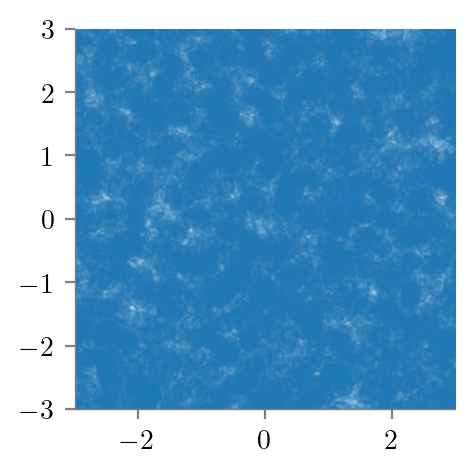

In [166]:
t = new_vecs
plt.scatter(t[:, 0], t[:, 1], alpha=0.2)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
ax = plt.gca()
format_axes(ax)
ax.set_aspect('equal')
plt.savefig('../figures/linear-regression/geoemetric-span-3.pdf', bbox_inches='tight')


In [167]:
A = np.array([1, 2])
B = np.array([2, 4])

AB_matrix = np.zeros((2, 2))
# First column is A, second column is B
AB_matrix[:, 0] = A
AB_matrix[:, 1] = B

print(AB_matrix)

[[1. 2.]
 [2. 4.]]

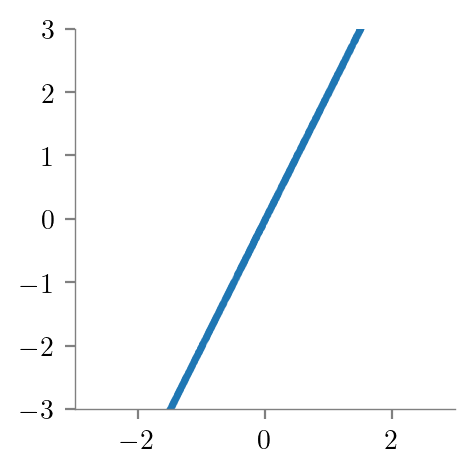

In [168]:
# Generate a bunch of alphas
alphas = np.random.uniform(-3, 3, size=(10000, 2))
new_vecs = []
for i, alpha in enumerate(alphas):
    new_vecs.append(new_vector(AB_matrix, alpha))

new_vecs = np.array(new_vecs)

plt.scatter(new_vecs[:, 0], new_vecs[:, 1], alpha=0.2, s=2)
ax = plt.gca()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
format_axes(ax)
ax.set_aspect('equal')
plt.savefig('../figures/linear-regression/geoemetric-span-4.pdf', bbox_inches='tight')


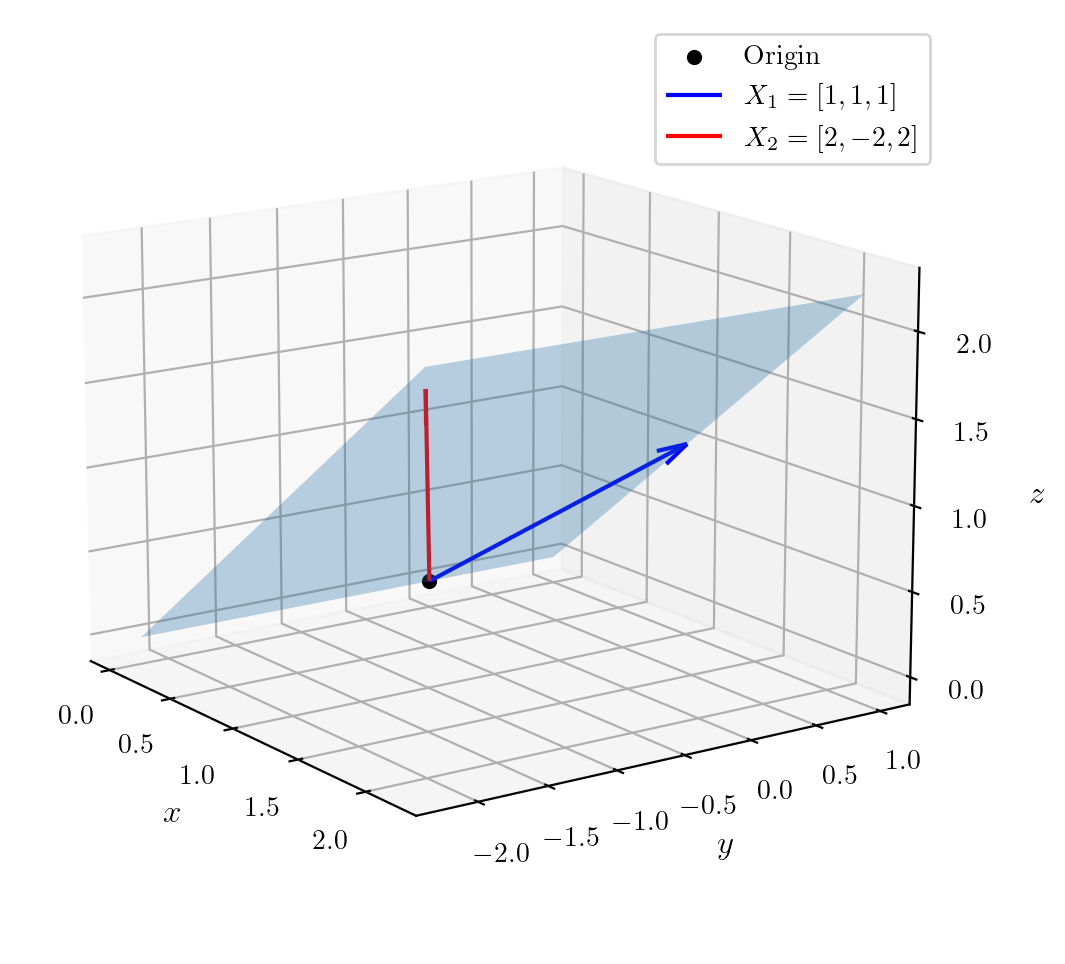

In [141]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define the surface plot
X = np.linspace(0, 2.2, 100)
Y = np.linspace(-2.2, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = X

# Plot the surface
surf = ax.plot_surface(X, Y, Z,  alpha=0.3, rstride=100, cstride=100)

# Define points
A = np.array([1, 1, 1])
D = np.array([0, 0, 0])
B = np.array([2, -2, 2])

# Mark the origin
ax.scatter(*D, color='black', label='Origin')

# Plot vectors with labels including the vector
ax.quiver(D[0], D[1], D[2], A[0], A[1], A[2], color='b', label=f'$X_1 = {A.tolist()}$', arrow_length_ratio=0.1)
ax.quiver(D[0], D[1], D[2], B[0], B[1], B[2], color='r', label=f'$X_2 = {B.tolist()}$', arrow_length_ratio=0.1)

# Set axis labels
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.set_zlabel('$z$', fontsize=12)

# Set legend
ax.legend()

# Adjust view angle
ax.view_init(elev=15, azim=-35)

# Customize grid lines
ax.grid(linestyle='dashed', color='white', alpha=0.2)  # Adjust color here


plt.savefig("../figures/linear-regression/geometric-1.pdf", bbox_inches='tight')


[[ 1.  2.]
 [ 1. -2.]
 [ 1.  2.]]
[2.97445  1.180725]
[5.3359 0.613  5.3359]

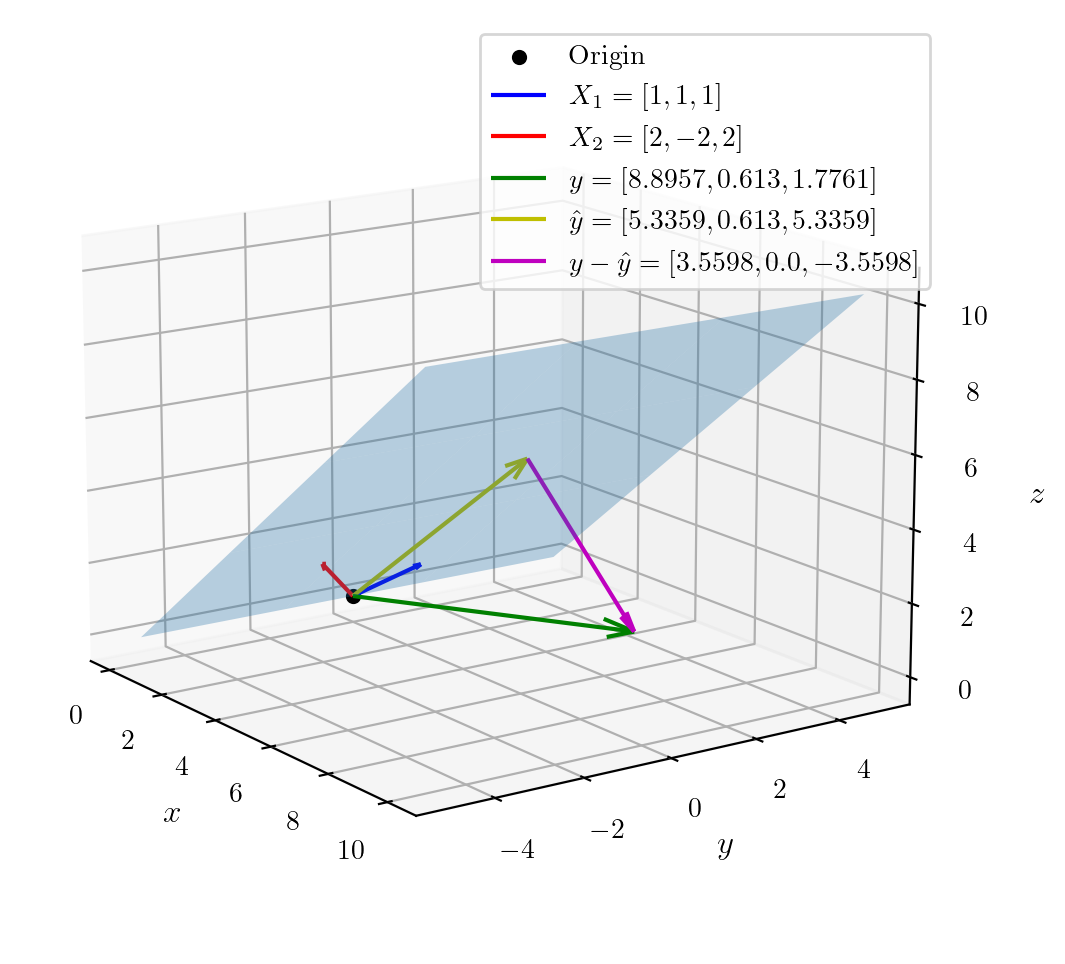

In [139]:


# Create a figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define the surface plot
X = np.linspace(0, 10.2, 300)
Y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(X, Y)
Z = X

# Plot the surface
surf = ax.plot_surface(X, Y, Z, alpha=0.3, rstride=100, cstride=100,)

# Define points
A = np.array([1, 1, 1])
D = np.array([0, 0, 0])
B = np.array([2, -2, 2])
y_vec = np.array([8.8957, 0.6130, 1.7761])

# Mark the origin
ax.scatter(*D, color='black', label='Origin')

# Plot vectors with labels including the vector
ax.quiver(D[0], D[1], D[2], A[0], A[1], A[2], color='b', label=f'$X_1 = {A.tolist()}$', arrow_length_ratio=0.1)
ax.quiver(D[0], D[1], D[2], B[0], B[1], B[2], color='r', label=f'$X_2 = {B.tolist()}$', arrow_length_ratio=0.1)
ax.quiver(D[0], D[1], D[2], y_vec[0], y_vec[1], y_vec[2], color='g', label=f'$y = {y_vec.tolist()}$', arrow_length_ratio=0.1)

# Set axis labels
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.set_zlabel('$z$', fontsize=12)

# Set legend
ax.legend()

# Adjust view angle
ax.view_init(elev=15, azim=-35)

# Customize grid lines
ax.grid(linestyle='dashed', color='white', alpha=0.2)  # Adjust color here


plt.savefig("../figures/linear-regression/geometric-2.pdf", bbox_inches="tight")


X_matrix = np.zeros((3, 2))
X_matrix[:, 0] = A
X_matrix[:, 1] = B

print(X_matrix)

theta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_vec

print(theta_hat)

y_hat = X_matrix @ theta_hat
print(y_hat)


# Plot y_hat vector
ax.quiver(D[0], D[1], D[2], y_hat[0], y_hat[1], y_hat[2], color='y', label=f'$\hat y = {list(map(lambda x: round(x, 4), y_hat))}$', arrow_length_ratio=0.1)
plt.legend()
plt.savefig("../figures/linear-regression/geometric-3.pdf", bbox_inches="tight")


# perpendiculat vector
perp_vec = y_vec - y_hat
# Plot perp vector with y_hat as origin
ax.quiver(y_hat[0], y_hat[1], y_hat[2], perp_vec[0], perp_vec[1], perp_vec[2], color='m', label=f'$y - \hat y = {list(map(lambda x: round(x, 4), perp_vec))}$', arrow_length_ratio=0.1)
plt.legend()
plt.savefig("../figures/linear-regression/geometric-4.pdf", bbox_inches="tight")

In [169]:
perp_vec

array([ 3.5598,  0.    , -3.5598])

In [170]:
X_matrix[:, 0]

array([1., 1., 1.])

In [145]:

perp_vec@X_matrix[:, 0]

-1.3322676295501878e-15

In [146]:
perp_vec@X_matrix[:, 1]

-2.6645352591003757e-15

In [148]:
X_matrix.T @ perp_vec

array([-1.33226763e-15, -2.66453526e-15])